In [44]:
###Telecom Churn 

In [45]:
##Step 1: Importing Data

In [46]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [48]:
# Importing all datasets
churn_data = pd.read_csv(r'C:\Users\Hp\chrun project last\telecom_churn_data.csv')

In [49]:
###Step 2: Inspecting the Dataframe

In [50]:
# Let's see the head of our master dataset
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [51]:
# Let's check the dimensions of the dataframe
churn_data.shape

(99999, 226)

In [52]:
# let's look at the statistical aspects of the dataframe
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [53]:
# Let's see the type of each column
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [54]:
# Handle missing values (example: dropping columns with high missing values)
churn_data = churn_data.dropna(axis=1, thresh=int(0.8 * churn_data.shape[0]))  # Drop columns with more than 20% missing values

In [55]:
# Handle missing values (example: dropping columns with high missing values)
churn_data = churn_data.dropna(axis=1, thresh=int(0.8 * churn_data.shape[0]))  # Drop columns with more than 20% missing values

In [56]:
# Check for missing values
missing_values = churn_data.isnull().sum()
print(missing_values[missing_values > 0])

# For simplicity, let's drop rows with missing values (you may choose to impute them)
churn_data = churn_data.dropna()

loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_7     601
last_date_of_month_8    1100
                        ... 
ic_others_9             7745
date_of_last_rech_6     1607
date_of_last_rech_7     1767
date_of_last_rech_8     3622
date_of_last_rech_9     4760
Length: 126, dtype: int64


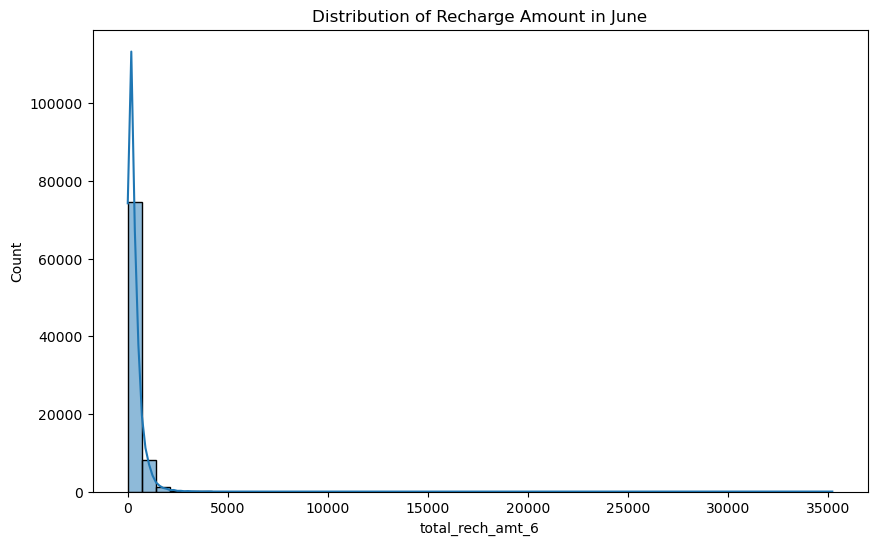

In [57]:
# Example: Distribution of recharge amounts
plt.figure(figsize=(10, 6))
sns.histplot(churn_data['total_rech_amt_6'], bins=50, kde=True)
plt.title('Distribution of Recharge Amount in June')
plt.show()

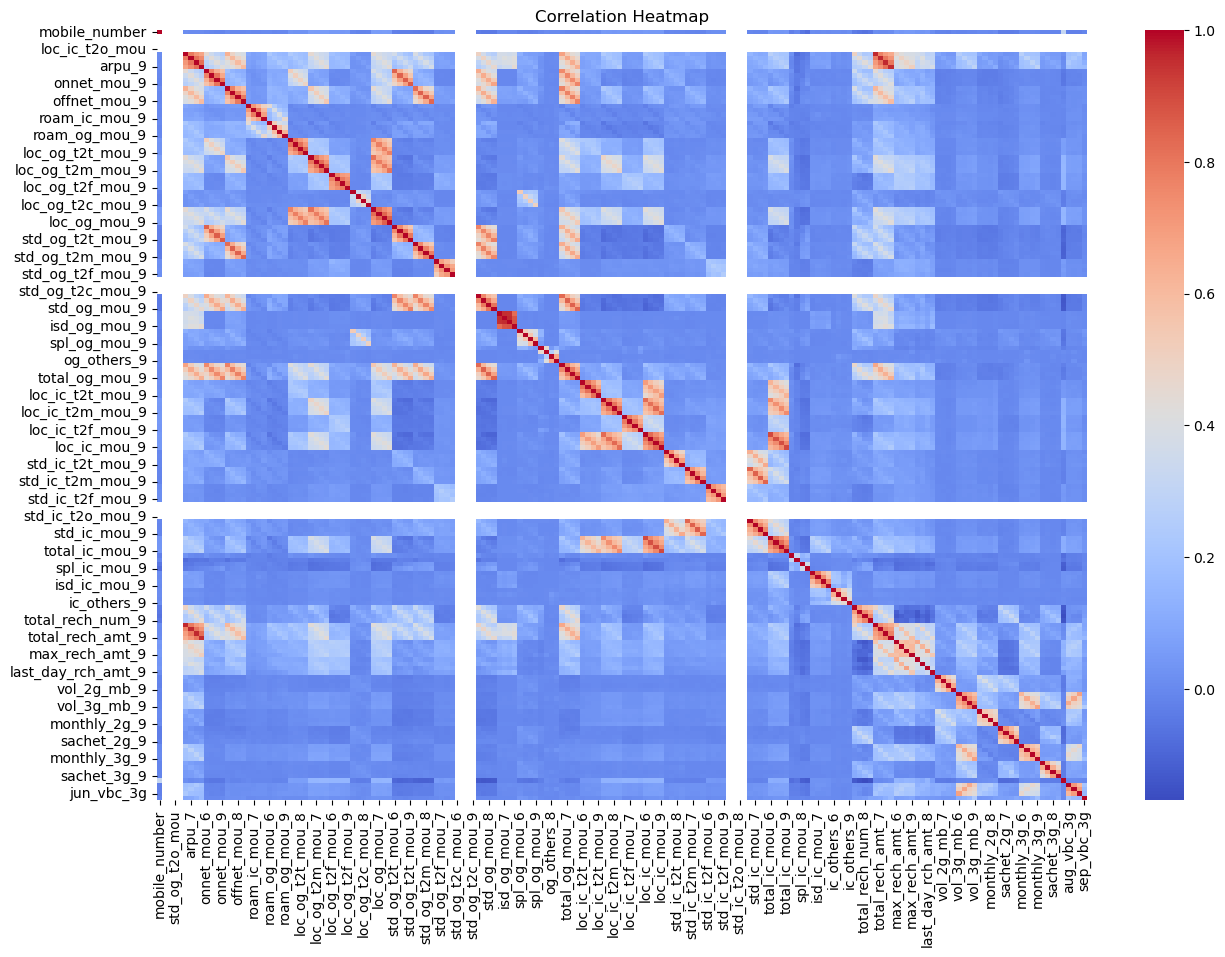

In [58]:
#Ensure Data is Numeric for Correlation Calculation
# Select only numeric columns for correlation
numeric_columns = churn_data.select_dtypes(include=[np.number])

# Generate the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


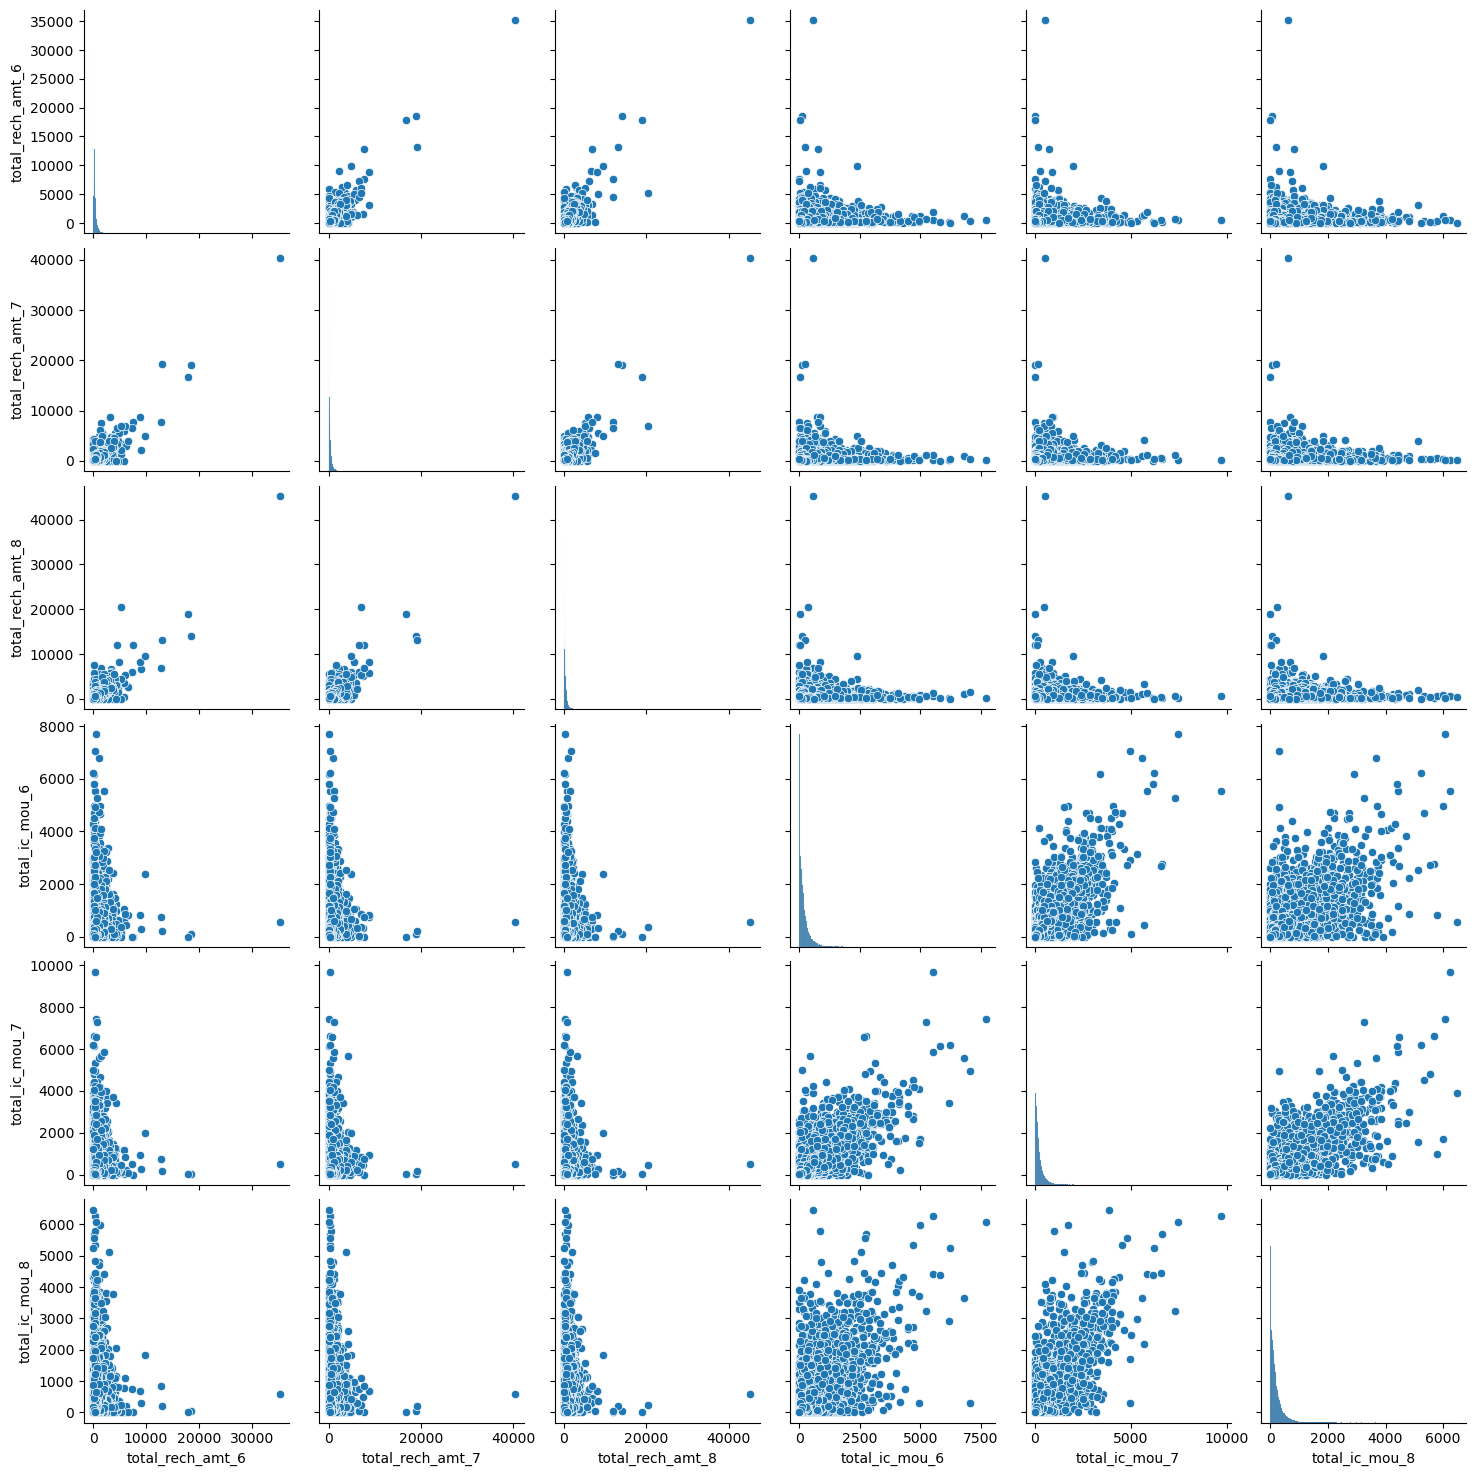

In [59]:
# Pairplot for selected features
sns.pairplot(churn_data[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']])
plt.show()

In [60]:
# Feature Engineering

In [61]:
# Define high-value customers: 70th percentile of average recharge in first two months
churn_data['avg_rech_amt_6_7'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7']) / 2
high_value_threshold = churn_data['avg_rech_amt_6_7'].quantile(0.7)
churn_data_high_value = churn_data[churn_data['avg_rech_amt_6_7'] >= high_value_threshold]

# Tag churners based on the 9th month's data
churn_data_high_value['churn'] = np.where(
    (churn_data_high_value['total_ic_mou_9'] == 0) & 
    (churn_data_high_value['total_og_mou_9'] == 0) & 
    (churn_data_high_value['vol_2g_mb_9'] == 0) & 
    (churn_data_high_value['vol_3g_mb_9'] == 0), 1, 0
)

# Drop columns corresponding to the 9th month
churn_data_high_value = churn_data_high_value.drop([col for col in churn_data_high_value.columns if '_9' in col], axis=1)

In [62]:
# Define the conditions for churn (example based on provided columns)
churn_data['churn'] = np.where(
    (churn_data['total_ic_mou_9'] == 0) &
    (churn_data['total_og_mou_9'] == 0) &
    (churn_data['vol_2g_mb_9'] == 0) &
    (churn_data['vol_3g_mb_9'] == 0), 1, 0
)

# 'churn' is now your target variable

In [63]:
#Model Building and Hyperparameter Tuning

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Assume churn_data is your DataFrame

# Drop non-numeric columns like dates
churn_data_cleaned = churn_data.select_dtypes(include=[np.number])

# Alternatively, you can drop specific columns that are non-numeric or irrelevant
# churn_data_cleaned = churn_data.drop(columns=['date_column'])

# Define feature matrix and target variable
X = churn_data_cleaned.drop(columns=['churn'])  # Replace 'churn' with your actual target variable name
y = churn_data['churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))

Accuracy: 0.9999604054482103
ROC AUC Score: 0.9999998063141905


In [65]:
#Model Evaluation

In [ ]:
# Evaluate the best model
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Recommendations and Business Impact

In [ ]:
# Identify top features
top_features = [X.columns[i] for i in indices[:10]]
print("Top Features Indicating Churn:", top_features)

# Recommendations
print("""
Recommendations:
1. Focus on the top features that indicate high churn risk, such as high variance in recharge amounts.
2. Provide targeted offers or discounts to customers showing early signs of reduced usage.
3. Enhance customer service to address potential dissatisfaction during the 'action' phase.
""")


In [ ]:
#Conclusion and Final Comments

In [ ]:
# Final remarks on model performance and recommendations for deployment.
